# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results,on='Mouse ID')

# Display the data table for preview
combined_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [45]:
combined_data.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [46]:
# Checking the number of mice.
mouse_ids = combined_data["Mouse ID"].unique()
len(mouse_ids)

249

In [47]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
temp_mouse_id_timepoint = combined_data[["Mouse ID","Timepoint"]]
duplicate_mouse_index = pd.DataFrame(temp_mouse_id_timepoint.duplicated().reset_index(name='DupRecord'))
duplicate_mouse_index = duplicate_mouse_index.loc[duplicate_mouse_index['DupRecord'] == True]
duplicate_mouse_index

,index,DupRecord
909,909,True
911,911,True
913,913,True
915,915,True
917,917,True


In [48]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids = combined_data.iloc[duplicate_mouse_index["index"]]
duplicate_mouse_ids

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [49]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
print(f'Total combined data:{len(combined_data)}')
combined_data_clean = combined_data.drop_duplicates(subset=['Mouse ID','Timepoint'],keep='last')

Total combined data:1893


In [50]:
# Checking the number of mice in the clean DataFrame.
print(f'Total combined data without duplicates: {len(combined_data_clean)}')

Total combined data without duplicates: 1888


## Summary Statistics

In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
combined_data_clean.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,12.792903,25.661547,19.597458,50.448411,1.023305
std,7.186737,3.926776,14.084762,8.904752,1.138751
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951421,1.000000
75%,20.000000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [52]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_groupby_obj = combined_data_clean.groupby(["Drug Regimen"])

regimen_group_tv_mean = regimen_groupby_obj["Tumor Volume (mm3)"].mean()
regimen_group_tv_median = regimen_groupby_obj["Tumor Volume (mm3)"].median()
regimen_group_tv_variance = regimen_groupby_obj["Tumor Volume (mm3)"].var()

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
regimen_group = combined_data_clean.groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std','sem']})
regimen_group


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

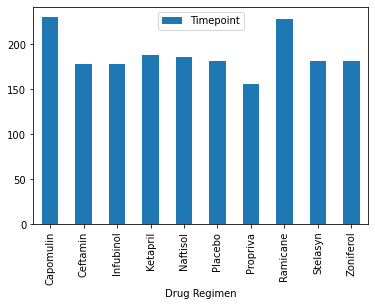

In [54]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regime_groupby = pd.DataFrame(combined_data_clean.groupby(["Drug Regimen"]).count())
drug_regime_groupby_tp = drug_regime_groupby[["Timepoint"]]
drug_regime_groupby_tp.plot.bar()
plt.show()


Text(0.5, 1.0, 'No of Data Points vs Drug Regimen')

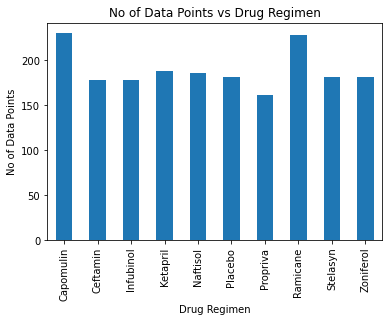

In [55]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug_regime_groupby_pybar = pd.DataFrame(combined_data.groupby('Drug Regimen').count()['Tumor Volume (mm3)'])
plt.xdata = drug_regime_groupby_pybar.plot.bar(legend=False)
plt.xlabel('Drug Regimen')
plt.ylabel('No of Data Points')
plt.title('No of Data Points vs Drug Regimen')

<AxesSubplot:title={'center':'Distribution of Sex'}, ylabel='Mouse ID'>

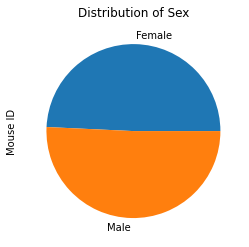

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
drug_sex_groupby = combined_data_clean.groupby(["Sex"]).count()["Mouse ID"]
drug_sex_groupby.plot.pie(y='Sex',title='Distribution of Sex')
# plt.show()

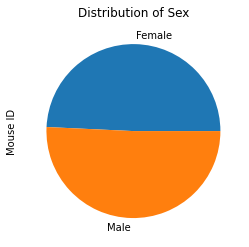

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
drug_sex_groupby_df = pd.DataFrame(drug_sex_groupby)
plt.pie(drug_sex_groupby,labels=drug_sex_groupby_df.index)
plt.title('Distribution of Sex')
plt.ylabel('Mouse ID')
plt.show()


## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Ramicane, Ramicane, Infubinol, and Ceftamin
Capomulin_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_max = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_max_df = pd.DataFrame(Capomulin_max)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_max_merge = pd.merge(Capomulin_max_df,combined_data,on=("Mouse ID","Timepoint"),how="left")
Capomulin_max_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [59]:
# Ramicane
Ramicane_df = combined_data.loc[combined_data["Drug Regimen"] == "Ramicane", :]

# Start by getting the last (greatest) timepoint for each mouse
Ramicane_max = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_max_df = pd.DataFrame(Ramicane_max)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Ramicane_max_merge = pd.merge(Ramicane_max_df,combined_data,on=("Mouse ID","Timepoint"),how="left")
Ramicane_max_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [60]:

#Infubinol
Infubinol_df = combined_data.loc[combined_data["Drug Regimen"] == "Infubinol", :]

# Start by getting the last (greatest) timepoint for each mouse
Infubinol_max = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_max_df = pd.DataFrame(Infubinol_max)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Infubinol_max_merge = pd.merge(Infubinol_max_df,combined_data,on=("Mouse ID","Timepoint"),how="left")
Infubinol_max_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [61]:
#Ceftamin
Ceftamin_df = combined_data.loc[combined_data["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
Ceftamin_max = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_max_df = pd.DataFrame(Ceftamin_max)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Ceftamin_max_merge = pd.merge(Ceftamin_max_df,combined_data,on=("Mouse ID","Timepoint"),how="left")
Ceftamin_max_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [62]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
Capomulin_tumor_vol = Capomulin_max_merge["Tumor Volume (mm3)"]
Ramicane_tumor_vol = Ramicane_max_merge["Tumor Volume (mm3)"]
Infubinol_tumor_vol = Infubinol_max_merge["Tumor Volume (mm3)"]
Ceftamin_tumor_vol = Ceftamin_max_merge["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Capomulin_quartiles = Capomulin_tumor_vol.quantile([0.25,0.5,0.75])
Capomulin_lower_quartile = Capomulin_quartiles[0.25]
Capomulin_upper_quartile = Capomulin_quartiles[0.75]
Capomulin_iqr = Capomulin_upper_quartile-Capomulin_lower_quartile

Ramicane_quartiles = Ramicane_tumor_vol.quantile([0.25,0.5,0.75])
Ramicane_lower_quartile = Ramicane_quartiles[0.25]
Ramicane_upper_quartile = Ramicane_quartiles[0.75]
Ramicane_iqr = Ramicane_upper_quartile-Ramicane_lower_quartile

Infubinol_quartiles = Infubinol_tumor_vol.quantile([0.25,0.5,0.75])
Infubinol_lower_quartile = Infubinol_quartiles[0.25]
Infubinol_upper_quartile = Infubinol_quartiles[0.75]
Infubinol_iqr = Infubinol_upper_quartile-Infubinol_lower_quartile

Ceftamin_quartiles = Ceftamin_tumor_vol.quantile([0.25,0.5,0.75])
Ceftamin_lower_quartile = Ceftamin_quartiles[0.25]
Ceftamin_upper_quartile = Ceftamin_quartiles[0.75]
Ceftamin_iqr = Ceftamin_upper_quartile-Ceftamin_lower_quartile

#outliers
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
Capomulin_lower_bound = Capomulin_lower_quartile - (1.5*Capomulin_iqr)
Capomulin_upper_bound = Capomulin_upper_quartile + (1.5*Capomulin_iqr)

Ramicane_lower_bound = Ramicane_lower_quartile - (1.5*Ramicane_iqr)
Ramicane_upper_bound = Ramicane_upper_quartile + (1.5*Ramicane_iqr)

Infubinol_lower_bound = Infubinol_lower_quartile - (1.5*Infubinol_iqr)
Infubinol_upper_bound = Infubinol_upper_quartile + (1.5*Infubinol_iqr)

Ceftamin_lower_bound = Ceftamin_lower_quartile - (1.5*Ceftamin_iqr)
Ceftamin_upper_bound = Ceftamin_upper_quartile + (1.5*Ceftamin_iqr)

print(f"Potential outliers could be:")
print(f'Capomulin: Below {Capomulin_lower_bound} and Above {Capomulin_upper_bound}')
print(f'Ramicane: Below {Ramicane_lower_bound} and Above {Ramicane_upper_bound}')
print(f'Infubinol: Below {Infubinol_lower_bound} and Above {Infubinol_upper_bound}')
print(f'Ceftamin: Below {Ceftamin_lower_bound} and Above {Ceftamin_upper_bound}')



Potential outliers could be:
Capomulin: Below 20.70456164999999 and Above 51.83201549
Ramicane: Below 17.912664470000003 and Above 54.30681135
Infubinol: Below 36.83290494999999 and Above 82.74144559000001
Ceftamin: Below 25.355449580000002 and Above 87.66645829999999


{'whiskers': [<matplotlib.lines.Line2D at 0x1a9dacf7f40>,
 'caps': [<matplotlib.lines.Line2D at 0x1a9dacf5870>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a9dacf5270>],
 'medians': [<matplotlib.lines.Line2D at 0x1a9dacf47c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a9dacf5ed0>],
 'means': []}

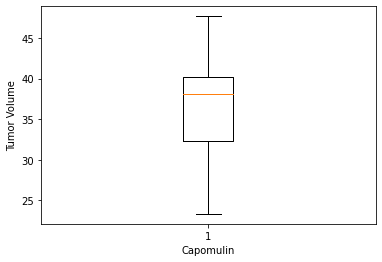

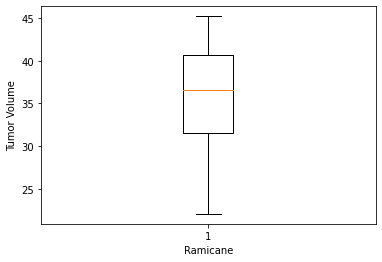

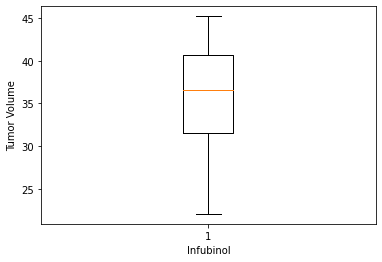

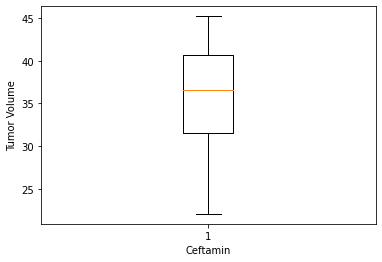

In [63]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
bplotc, Capomulin_d = plt.subplots()
Capomulin_d.set_xlabel('Capomulin')
Capomulin_d.set_ylabel('Tumor Volume')
Capomulin_d.boxplot(Capomulin_tumor_vol)

bplotr, Ramicane_d = plt.subplots()
Ramicane_d.set_xlabel('Ramicane')
Ramicane_d.set_ylabel('Tumor Volume')
Ramicane_d.boxplot(Ramicane_tumor_vol)

bploti, Infubinol_d = plt.subplots()
Infubinol_d.set_xlabel('Infubinol')
Infubinol_d.set_ylabel('Tumor Volume')
Infubinol_d.boxplot(Ramicane_tumor_vol)

bplotce, Ceftamin_d = plt.subplots()
Ceftamin_d.set_xlabel('Ceftamin')
Ceftamin_d.set_ylabel('Tumor Volume')
Ceftamin_d.boxplot(Ramicane_tumor_vol)


## Line and Scatter Plots

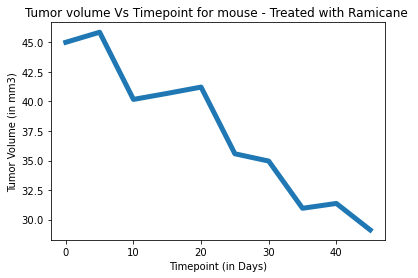

In [64]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Ramicane
lplot_df = Ramicane_df.loc[Ramicane_df["Mouse ID"] == "g791",:]
tp_series = lplot_df["Timepoint"]
tv_series = lplot_df["Tumor Volume (mm3)"]

plt.title('Tumor volume Vs Timepoint for mouse - Treated with Ramicane ')
plt.plot(tp_series,tv_series,linewidth=5, markersize=20)
plt.xlabel('Timepoint (in Days)')
plt.ylabel('Tumor Volume (in mm3)')
plt.show()


In [65]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Ramicane regimen
Ramicane_average = Ramicane_df.groupby(['Mouse ID']).mean()
Ramicane_average.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
a411,3.0,22.0,22.5,40.701385,0.800000
a444,10.0,25.0,22.5,43.060052,0.000000
a520,13.0,21.0,22.5,37.989219,0.500000
a644,7.0,17.0,22.5,41.228577,0.100000
c458,23.0,20.0,15.0,42.269196,1.285714


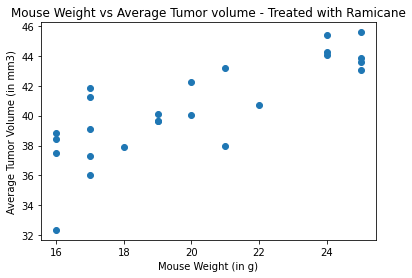

In [66]:
plt.scatter(Ramicane_average['Weight (g)'],Ramicane_average['Tumor Volume (mm3)'])
plt.xlabel('Mouse Weight (in g)')
plt.ylabel('Average Tumor Volume (in mm3)')
plt.title('Mouse Weight vs Average Tumor volume - Treated with Ramicane')
plt.show()

## Correlation and Regression

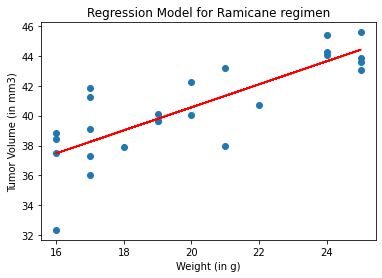

In [67]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Ramicane regimen
x_values = Ramicane_average['Weight (g)']
y_values = Ramicane_average['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title('Regression Model for Ramicane regimen')
plt.xlabel('Weight (in g)')
plt.ylabel('Tumor Volume (in mm3)')
plt.show()
